In [41]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123829 sha256=60b6841d6fddf953072ce03c603894cd6cbd1da20888a061850db5f4c77ea3a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-or4pcroz/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
nb_erdos = 8

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  14
Nb of segmented nodes :  14.0
Nb of links :  62
Nb of segmented links :  118.0
Nb of event times :  92


In [3]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


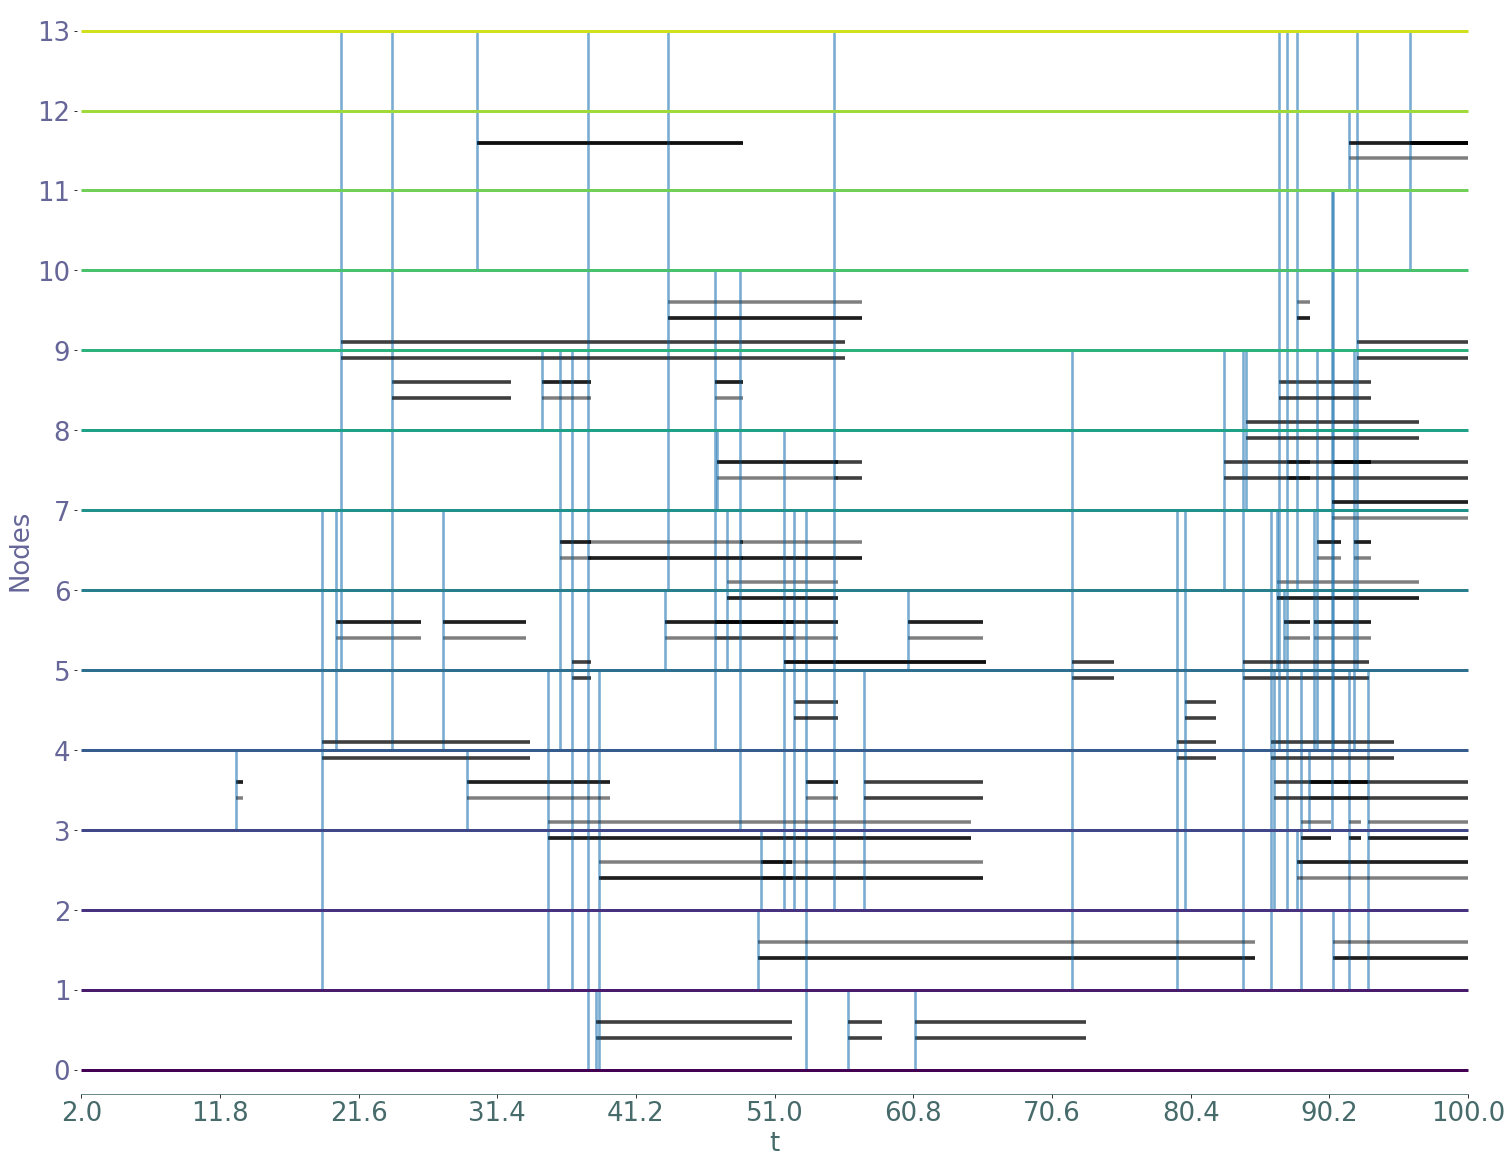

In [4]:
S.plot()

In [5]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [6]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [7]:
events, events_reverse = bt.events_dic(nouveau)

In [8]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [9]:
node = 10

In [10]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [11]:
cur_best[5]

{2.0109770323050946: (-inf, inf),
 12.9414970933256: (-inf, inf),
 13.399624034629847: (-inf, inf),
 19.004395331202318: (-inf, inf),
 20.02590006283754: (-inf, inf),
 20.358456906870508: (-inf, inf),
 23.983439152747145: (-inf, inf),
 25.97957964784327: (-inf, inf),
 27.562930013367748: (-inf, inf),
 29.25305897228746: (-inf, inf),
 29.980542920690997: (29.980542920690997, 2),
 32.35564951059685: (32.35564951059685, 2),
 33.39858298908548: (33.39858298908548, 2),
 33.68420217251255: (33.68420217251255, 2),
 34.56852623145108: (34.56852623145108, 2),
 34.94880940007197: (34.94880940007197, 2),
 35.845168080990085: (35.845168080990085, 2),
 36.69718008266238: (36.69718008266238, 2),
 37.801204380587215: (37.801204380587215, 2),
 38.00115310843021: (38.00115310843021, 2),
 38.385932498830876: (38.385932498830876, 2),
 38.57045306057162: (38.57045306057162, 2),
 39.36287579217078: (39.36287579217078, 2),
 43.2548163868659: (43.2548163868659, 2),
 43.458078188108644: (43.458078188108644, 2

In [12]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [13]:
lat_triplet[1]

[[29.980542920690997, 29.980542920690997, 4],
 [32.35564951059685, 32.35564951059685, 4],
 [34.94880940007197, 34.94880940007197, 3],
 [35.845168080990085, 35.845168080990085, 3],
 [36.69718008266238, 36.69718008266238, 3],
 [37.801204380587215, 37.801204380587215, 3],
 [38.00115310843021, 38.00115310843021, 3],
 [38.385932498830876, 38.385932498830876, 3],
 [38.57045306057162, 38.57045306057162, 3],
 [39.36287579217078, 39.36287579217078, 3],
 [43.2548163868659, 43.2548163868659, 3],
 [43.458078188108644, 43.458078188108644, 3],
 [46.76583040552515, 46.76583040552515, 3],
 [46.81232535871056, 46.81232535871056, 3],
 [46.90412030964997, 46.90412030964997, 3],
 [47.654375402102914, 47.654375402102914, 3],
 [48.570092408137825, 48.570092408137825, 3],
 [48.774350390362976, 48.774350390362976, 3],
 [95.92131140433415, 95.92131140433415, 3],
 [96.51756037949488, 96.51756037949488, 3],
 [100.0, 100.0, 3]]

In [14]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

********** (47.654375402102914, 48.570092408137825) **************
[(13, 48.570092408137825), (6, 48.570092408137825), (0, 48.570092408137825), (7, 48.570092408137825), (8, 48.570092408137825), (5, 48.570092408137825), (1, 48.570092408137825), (4, 48.570092408137825)]
///////////////////////
(4, 48.570092408137825) {} {(4, 48.570092408137825)}
(1, 48.570092408137825) {} {(1, 48.570092408137825)}
(5, 48.570092408137825) {} {(5, 48.570092408137825)}
(1, 48.570092408137825) {} {(5, 48.570092408137825)}
(8, 48.570092408137825) {} {(8, 48.570092408137825)}
(7, 48.570092408137825) {} {(7, 48.570092408137825)}
(5, 48.570092408137825) {} {(7, 48.570092408137825)}
(8, 48.570092408137825) {} {(7, 48.570092408137825)}
(4, 48.570092408137825) {} {(7, 48.570092408137825)}
(0, 48.570092408137825) {} {(0, 48.570092408137825)}
(1, 48.570092408137825) {} {(0, 48.570092408137825)}
(6, 48.570092408137825) {} {(6, 48.570092408137825)}
(13, 48.570092408137825) {} {(13, 48.570092408137825)}
(5, 48.570092408

(1, 60.93237106024006) {} {(5, 52.36657582858103)}
(5, 52.37920458587425) {} {(5, 52.37920458587425)}
(1, 60.93237106024006) {} {(5, 52.37920458587425)}
(5, 53.243200997307675) {} {(5, 53.243200997307675)}
(1, 60.93237106024006) {} {(5, 53.243200997307675)}
(5, 55.21438025221634) {} {(5, 55.21438025221634)}
(1, 60.93237106024006) {} {(5, 55.21438025221634)}
(5, 55.46800279503132) {} {(5, 55.46800279503132)}
(1, 60.93237106024006) {} {(5, 55.46800279503132)}
(2, 55.968604654213266) {} {(2, 55.968604654213266)}
(1, 60.93237106024006) {} {(2, 55.968604654213266)}
(2, 56.17723606151408) {} {(2, 56.17723606151408)}
(1, 60.93237106024006) {} {(2, 56.17723606151408)}
(2, 57.183859462569046) {} {(2, 57.183859462569046)}
(1, 60.93237106024006) {} {(2, 57.183859462569046)}
(5, 55.968604654213266) {} {(5, 55.968604654213266)}
(1, 60.93237106024006) {} {(5, 55.968604654213266)}
********** (60.93237106024006, 64.85051201339003) **************
[(5, 55.968604654213266), (2, 57.183859462569046), (2, 5

(1, 92.43195257899498) {} {(7, 48.774350390362976)}
(13, 48.774350390362976) {} {(13, 48.774350390362976)}
(5, 92.43195257899498) {} {(13, 48.774350390362976)}
(2, 92.43195257899498) {} {(13, 48.774350390362976)}
(4, 92.43195257899498) {} {(13, 48.774350390362976)}
********** (92.43195257899498, 92.93517915263575) **************
[(13, 48.774350390362976), (7, 48.774350390362976), (9, 92.93517915263575), (5, 92.93517915263575), (1, 92.93517915263575), (11, 92.43195257899498), (11, 92.13696544017236), (11, 91.94318502991324), (11, 91.62289003876734), (11, 91.59700880297702), (11, 91.03947991132488), (11, 90.47050670722884), (11, 90.449254959981), (11, 90.40466685242764), (3, 48.774350390362976), (11, 92.93517915263575), (12, 92.93517915263575), (4, 92.93517915263575), (2, 92.93517915263575)]
///////////////////////
(2, 92.93517915263575) {} {(2, 92.93517915263575)}
(4, 92.93517915263575) {} {(4, 92.93517915263575)}
(12, 92.93517915263575) {} {(12, 92.93517915263575)}
(11, 92.935179152635

In [15]:
import networkx as nx
GD = Gp[(70.95868453710477, 72.13340058339028)].graph
ren = dict()
for e in GD.nodes:
    ren[e] = (nouveau.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

KeyError: (70.95868453710477, 72.13340058339028)

In [16]:
for e in G.graph[(5,75.61304700994472)]:
    print(e)

KeyError: (5, 75.61304700994472)

In [17]:
GG.l_nei[(5, 75.61304700994472)]

KeyError: (5, 75.61304700994472)

In [18]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(5,43.20861816893123)):
        print(path)

In [19]:
edge = bt.edges(nouveau)

In [20]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

10 3 48.570092408137825 -1 -1
t1p,t2p 48.570092408137825 48.570092408137825
10 7 48.570092408137825 48.570092408137825 48.570092408137825
t1p,t2p 47.654375402102914 48.570092408137825
10 13 48.570092408137825 48.570092408137825 48.570092408137825
t1p,t2p 47.654375402102914 48.570092408137825
10 3 48.570092408137825 -1 -1
edge after 48.570092408137825 48.774350390362976
10 7 48.570092408137825 48.570092408137825 48.774350390362976
edge after 48.570092408137825 48.774350390362976
7 4 48.570092408137825 48.570092408137825 48.774350390362976
edge after 48.570092408137825 48.774350390362976
7 5 48.570092408137825 48.570092408137825 48.774350390362976
edge after 48.570092408137825 48.774350390362976
5 1 48.570092408137825 48.570092408137825 48.774350390362976
edge after 48.570092408137825 48.774350390362976
7 8 48.570092408137825 48.570092408137825 48.774350390362976
edge after 48.570092408137825 48.774350390362976
10 13 48.570092408137825 48.570092408137825 48.774350390362976
edge after 48.

t1p,t2p 92.9588428302675 92.97326173072845
13 5 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 92.97326173072845 93.14353349522267
13 5 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 93.14353349522267 94.79337296938155
13 6 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 48.570092408137825 48.774350390362976
6 9 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 82.73259901701341 82.73259901701341
6 9 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 82.73259901701341 84.11636912056576
13 6 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 48.774350390362976 49.825544608944845
13 6 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 49.825544608944845 50.027053296920634
13 6 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 50.027053296920634 51.66511360390297
13 6 48.774350390362976 48.570092408137825 48.774350390362976
t1p,t2p 51.66511360390297 52.1963101962716

In [21]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [22]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [23]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [24]:
after[4]

{2.0109770323050946: False,
 12.9414970933256: False,
 13.399624034629847: False,
 19.004395331202318: False,
 20.02590006283754: False,
 20.358456906870508: False,
 23.983439152747145: False,
 25.97957964784327: False,
 27.562930013367748: False,
 29.25305897228746: False,
 29.980542920690997: True,
 32.35564951059685: False,
 33.39858298908548: False,
 33.68420217251255: False,
 34.56852623145108: False,
 34.94880940007197: False,
 35.845168080990085: False,
 36.69718008266238: True,
 37.801204380587215: True,
 38.00115310843021: False,
 38.385932498830876: False,
 38.57045306057162: False,
 39.36287579217078: False,
 43.2548163868659: False,
 43.458078188108644: False,
 46.76583040552515: False,
 46.81232535871056: True,
 46.90412030964997: True,
 47.654375402102914: True,
 48.570092408137825: True,
 48.774350390362976: False,
 49.825544608944845: False,
 50.027053296920634: False,
 51.66511360390297: False,
 52.19631019627161: False,
 52.209253426500624: False,
 52.36657582858103: 

In [25]:
before[4]

{2.0109770323050946: False,
 12.9414970933256: False,
 13.399624034629847: False,
 19.004395331202318: False,
 20.02590006283754: False,
 20.358456906870508: False,
 23.983439152747145: False,
 25.97957964784327: False,
 27.562930013367748: False,
 29.25305897228746: False,
 29.980542920690997: False,
 32.35564951059685: True,
 33.39858298908548: False,
 33.68420217251255: False,
 34.56852623145108: False,
 34.94880940007197: False,
 35.845168080990085: False,
 36.69718008266238: False,
 37.801204380587215: True,
 38.00115310843021: True,
 38.385932498830876: False,
 38.57045306057162: False,
 39.36287579217078: False,
 43.2548163868659: False,
 43.458078188108644: False,
 46.76583040552515: False,
 46.81232535871056: False,
 46.90412030964997: True,
 47.654375402102914: True,
 48.570092408137825: True,
 48.774350390362976: True,
 49.825544608944845: False,
 50.027053296920634: False,
 51.66511360390297: False,
 52.19631019627161: False,
 52.209253426500624: False,
 52.36657582858103: 

In [26]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [27]:
sigma_r

{(0, 2.0109770323050946): vol(0,0),
 (0, 12.9414970933256): vol(0,0),
 (0, 13.399624034629847): vol(0,0),
 (0, 19.004395331202318): vol(0,0),
 (0, 20.02590006283754): vol(0,0),
 (0, 20.358456906870508): vol(0,0),
 (0, 23.983439152747145): vol(0,0),
 (0, 25.97957964784327): vol(0,0),
 (0, 27.562930013367748): vol(0,0),
 (0, 29.25305897228746): vol(0,0),
 (0, 29.980542920690997): vol(0,0),
 (0, 32.35564951059685): vol(0,0),
 (0, 33.39858298908548): vol(0,0),
 (0, 33.68420217251255): vol(0,0),
 (0, 34.56852623145108): vol(0,0),
 (0, 34.94880940007197): vol(0,0),
 (0, 35.845168080990085): vol(0,0),
 (0, 36.69718008266238): vol(0,0),
 (0, 37.801204380587215): vol(1,0),
 (0, 38.00115310843021): vol(1,0),
 (0, 38.385932498830876): vol(1,0),
 (0, 38.57045306057162): vol(1,0),
 (0, 39.36287579217078): vol(1,0),
 (0, 43.2548163868659): vol(1,0),
 (0, 43.458078188108644): vol(1,0),
 (0, 46.76583040552515): vol(1,0),
 (0, 46.81232535871056): vol(1,0),
 (0, 46.90412030964997): vol(1,0),
 (0, 47.654

In [28]:
lat_triplet[5]

[[29.980542920690997, 29.980542920690997, 2],
 [32.35564951059685, 32.35564951059685, 2],
 [33.39858298908548, 33.39858298908548, 2],
 [33.68420217251255, 33.68420217251255, 2],
 [34.56852623145108, 34.56852623145108, 2],
 [34.94880940007197, 34.94880940007197, 2],
 [35.845168080990085, 35.845168080990085, 2],
 [36.69718008266238, 36.69718008266238, 2],
 [37.801204380587215, 37.801204380587215, 2],
 [38.00115310843021, 38.00115310843021, 2],
 [38.385932498830876, 38.385932498830876, 2],
 [38.57045306057162, 38.57045306057162, 2],
 [39.36287579217078, 39.36287579217078, 2],
 [43.2548163868659, 43.2548163868659, 2],
 [43.458078188108644, 43.458078188108644, 2],
 [46.76583040552515, 46.76583040552515, 2],
 [46.81232535871056, 46.81232535871056, 2],
 [46.90412030964997, 46.90412030964997, 2],
 [47.654375402102914, 47.654375402102914, 2],
 [48.570092408137825, 48.570092408137825, 2],
 [48.774350390362976, 48.774350390362976, 2],
 [95.92131140433415, 95.92131140433415, 2],
 [96.5175603794948

In [29]:
contri[5]

NameError: name 'contri' is not defined

In [30]:
sigma_r[(5, 75.61304700994472)]

KeyError: (5, 75.61304700994472)

In [31]:
GG.l_nei[(1, 79.96710253478658)]

KeyError: (1, 79.96710253478658)

In [32]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [33]:
prev_next[0:8]

[{}, {}, {}, {}, {}, {}, {}, {}]

In [34]:
contri[6]

{43.2548163868659: (2.0109770323050946, 43.2548163868659),
 43.458078188108644: (43.458078188108644, 43.458078188108644),
 46.76583040552515: (46.76583040552515, 46.76583040552515),
 46.81232535871056: (46.81232535871056, 46.81232535871056),
 46.90412030964997: (46.90412030964997, 46.90412030964997),
 47.654375402102914: (47.654375402102914, 47.654375402102914),
 48.570092408137825: (48.570092408137825, 48.570092408137825),
 48.774350390362976: (48.774350390362976, 100.0)}

In [35]:
preced = bt.preced_node(S, G,events,events_reverse)

In [36]:
preced[2][65.90654777474518]

57.183859462569046

In [37]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [38]:
deltasvvt

{(13, 37.801204380587215): vol(0,0),
 (0, 37.801204380587215): vol(0,0),
 (13, 38.00115310843021): vol(0,0),
 (0, 38.00115310843021): vol(0,0),
 (13, 38.385932498830876): vol(0,0),
 (0, 38.385932498830876): vol(0,0),
 (13, 38.57045306057162): vol(0,0),
 (0, 38.57045306057162): vol(0,0),
 (13, 39.36287579217078): vol(0,0),
 (0, 39.36287579217078): vol(0,0),
 (13, 43.2548163868659): vol(0,0),
 (0, 43.2548163868659): vol(0,0),
 (13, 43.458078188108644): vol(0,0),
 (0, 43.458078188108644): vol(0,0),
 (13, 46.76583040552515): vol(0,0),
 (0, 46.76583040552515): vol(0,0),
 (13, 46.81232535871056): vol(0,0),
 (0, 46.81232535871056): vol(0,0),
 (13, 46.90412030964997): vol(0,0),
 (0, 46.90412030964997): vol(0,0),
 (13, 47.654375402102914): vol(0,0),
 (0, 47.654375402102914): vol(0,0),
 (13, 48.570092408137825): vol(0,0),
 (0, 48.570092408137825): vol(0,0),
 (13, 48.774350390362976): vol(0,0),
 (0, 48.774350390362976): vol(0,0),
 (0, 49.825544608944845): vol(0,0),
 (0, 50.027053296920634): vol(0

In [39]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt, preced)

PASSSSSSSS v,t 2 52.19631019627161 w_tp 1 65.90654777474518 ii 16 partial_sum {74.97090371795456: vol(0,0), 73.04013549443482: vol(0,0), 72.01646440110846: vol(7.479736566133427,0), 65.90654777474518: vol(7.740368107292159,0)}
PASSSSSSSS v,t 2 51.66511360390297 w_tp 1 65.90654777474518 ii 17 partial_sum {74.97090371795456: vol(0,0), 73.04013549443482: vol(0,0), 72.01646440110846: vol(5.64813673259874,0), 65.90654777474518: vol(5.844946148047637,0)}
PASSSSSSSS v,t 2 50.027053296920634 w_tp 1 65.90654777474518 ii 18 partial_sum {74.97090371795456: vol(0,0), 73.04013549443482: vol(0,0), 72.01646440110846: vol(0,0), 65.90654777474518: vol(0,0)}
PASSSSSSSS v,t 2 55.46800279503132 w_tp 1 65.90654777474518 ii 10 partial_sum {74.97090371795456: vol(0,0), 73.04013549443482: vol(0,0), 72.01646440110846: vol(19.048161911765675,0), 65.90654777474518: vol(19.711895420480797,0)}
PASSSSSSSS v,t 2 55.21438025221634 w_tp 1 65.90654777474518 ii 11 partial_sum {74.97090371795456: vol(0,0), 73.04013549443

In [40]:
contribution

{1: {100.0: vol(0,0),
  96.51756037949488: vol(0,0),
  95.92131140433415: vol(0,0),
  74.97090371795456: vol(0,0),
  73.04013549443482: vol(0,0),
  72.01646440110846: vol(257.53163276016954,0),
  65.90654777474518: vol(195.8993030831625,0),
  65.69364763145796: vol(193.75172356256112,0),
  64.85051201339003: vol(185.24679369969328,0),
  60.93237106024006: vol(115.01510159149642,0),
  60.43802277087988: vol(109.12079273912958,0),
  58.57152824097817: vol(86.86584523089977,0),
  57.28551739587099: vol(63.814423957053556,0),
  57.183859462569046: vol(61.9922310453162,0),
  56.17723606151408: vol(44.5205989072955,0),
  55.968604654213266: vol(42.16380535110477,0),
  55.46800279503132: vol(36.67967790508097,0),
  55.21438025221634: vol(34.045477890292005,0),
  53.243200997307675: vol(17.42563226955792,0),
  52.37920458587425: vol(12.2145047554612,0),
  52.36657582858103: vol(12.147706812345591,0),
  52.209253426500624: vol(11.331222655921783,0),
  52.19631019627161: vol(11.24025001795498,0)

In [41]:
contribution[2]

{100.0: vol(0,0),
 96.51756037949488: vol(0,0),
 95.92131140433415: vol(0,0),
 94.79337296938155: vol(0,0),
 93.14353349522267: vol(0,0),
 92.97326173072845: vol(0,0),
 92.9588428302675: vol(0,0),
 92.93517915263575: vol(0,0),
 92.43195257899498: vol(0,0),
 92.13696544017236: vol(0,0),
 91.94318502991324: vol(0,0),
 91.62289003876734: vol(0,0),
 91.59700880297702: vol(0,0),
 91.03947991132488: vol(0,0),
 90.47050670722884: vol(0,0),
 90.449254959981: vol(0,0),
 90.40466685242764: vol(0,0),
 90.3310719467752: vol(0,0),
 89.3537078176033: vol(0,0),
 89.14218652166947: vol(0,0),
 88.8487236315864: vol(0,0),
 88.78970117142694: vol(0,0),
 88.23045229532943: vol(0,0),
 87.93088971947972: vol(0,0),
 87.88831642518156: vol(0,0),
 52.209253426500624: vol(24.247911920866304,0),
 52.19631019627161: vol(24.263756973810253,0),
 51.66511360390297: vol(18.813221034755312,0),
 50.027053296920634: vol(0,0),
 82.22691129242558: vol(0,0),
 79.9960109506552: vol(0,0),
 55.46800279503132: vol(51.591174698

In [42]:
(5, 56.17723606151408) in G.nodes()

False

In [41]:
G.graph[(5, 75.61304700994472)][(2, 80.41206683462686)]

KeyError: (5, 75.61304700994472)

In [42]:
for e in G.sources():
    print(e)

(10, 48.570092408137825)
(10, 48.774350390362976)
(10, 46.76583040552515)
(10, 46.81232535871056)
(10, 46.90412030964997)
(10, 47.654375402102914)
(10, 29.980542920690997)
(10, 32.35564951059685)
(10, 33.39858298908548)
(10, 33.68420217251255)
(10, 34.56852623145108)
(10, 34.94880940007197)
(10, 35.845168080990085)
(10, 36.69718008266238)
(10, 37.801204380587215)
(10, 38.00115310843021)
(10, 38.385932498830876)
(10, 38.57045306057162)
(10, 39.36287579217078)
(10, 43.2548163868659)
(10, 43.458078188108644)
(10, 95.92131140433415)
(10, 96.51756037949488)
(10, 100.0)


In [58]:
for path in nx.all_simple_paths(G.graph, source=(10, 48.774350390362976,), target=(9, 72.01646440110846)):
    print(path)

[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 50.027053296920634), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 51.66511360390297), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.19631019627161), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.209253426500624), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.36657582858103), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.37920458587425), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 53.243200997307675), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 55.21438025221634), (9, 72.01646440110846

In [57]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(9, 72.01646440110846)):
        print(path)

[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 50.027053296920634), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 51.66511360390297), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.19631019627161), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.209253426500624), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.36657582858103), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.37920458587425), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 53.243200997307675), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 55.21438025221634), (9, 72.01646440110846

In [44]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(2, 79.73349567329026)):
        print(path)

In [45]:
deltasvvt[(2, 80.41206683462686)]

KeyError: (2, 80.41206683462686)

In [46]:
sigma_r[(2, 80.41206683462686)]

KeyError: (2, 80.41206683462686)

In [47]:
sigma_r[ (2, 79.73349567329026)]

KeyError: (2, 79.73349567329026)

In [48]:
lat_triplet[13]

[[29.980542920690997, 29.980542920690997, 1],
 [32.35564951059685, 32.35564951059685, 1],
 [33.39858298908548, 33.39858298908548, 1],
 [33.68420217251255, 33.68420217251255, 1],
 [34.56852623145108, 34.56852623145108, 1],
 [34.94880940007197, 34.94880940007197, 1],
 [35.845168080990085, 35.845168080990085, 1],
 [36.69718008266238, 36.69718008266238, 1],
 [37.801204380587215, 37.801204380587215, 1],
 [38.00115310843021, 38.00115310843021, 1],
 [38.385932498830876, 38.385932498830876, 1],
 [38.57045306057162, 38.57045306057162, 1],
 [39.36287579217078, 39.36287579217078, 1],
 [43.2548163868659, 43.2548163868659, 1],
 [43.458078188108644, 43.458078188108644, 1],
 [46.76583040552515, 46.76583040552515, 1],
 [46.81232535871056, 46.81232535871056, 1],
 [46.90412030964997, 46.90412030964997, 1],
 [47.654375402102914, 47.654375402102914, 1],
 [48.570092408137825, 48.570092408137825, 1],
 [48.774350390362976, 48.774350390362976, 1],
 [95.92131140433415, 95.92131140433415, 1],
 [96.5175603794948

In [49]:
prev_next[13]

{}

In [50]:
contri[13]

{29.980542920690997: (2.0109770323050946, 29.980542920690997),
 32.35564951059685: (32.35564951059685, 32.35564951059685),
 33.39858298908548: (33.39858298908548, 33.39858298908548),
 33.68420217251255: (33.68420217251255, 33.68420217251255),
 34.56852623145108: (34.56852623145108, 34.56852623145108),
 34.94880940007197: (34.94880940007197, 34.94880940007197),
 35.845168080990085: (35.845168080990085, 35.845168080990085),
 36.69718008266238: (36.69718008266238, 36.69718008266238),
 37.801204380587215: (37.801204380587215, 37.801204380587215),
 38.00115310843021: (38.00115310843021, 38.00115310843021),
 38.385932498830876: (38.385932498830876, 38.385932498830876),
 38.57045306057162: (38.57045306057162, 38.57045306057162),
 39.36287579217078: (39.36287579217078, 39.36287579217078),
 43.2548163868659: (43.2548163868659, 43.2548163868659),
 43.458078188108644: (43.458078188108644, 43.458078188108644),
 46.76583040552515: (46.76583040552515, 46.76583040552515),
 46.81232535871056: (46.8123

In [51]:
deltasvvt[(13,91.51014453612402)]

KeyError: (13, 91.51014453612402)

In [52]:
after[13]

{2.0109770323050946: False,
 12.9414970933256: False,
 13.399624034629847: False,
 19.004395331202318: False,
 20.02590006283754: False,
 20.358456906870508: False,
 23.983439152747145: False,
 25.97957964784327: False,
 27.562930013367748: False,
 29.25305897228746: False,
 29.980542920690997: True,
 32.35564951059685: True,
 33.39858298908548: True,
 33.68420217251255: True,
 34.56852623145108: True,
 34.94880940007197: True,
 35.845168080990085: True,
 36.69718008266238: True,
 37.801204380587215: True,
 38.00115310843021: True,
 38.385932498830876: True,
 38.57045306057162: True,
 39.36287579217078: True,
 43.2548163868659: True,
 43.458078188108644: True,
 46.76583040552515: True,
 46.81232535871056: True,
 46.90412030964997: True,
 47.654375402102914: True,
 48.570092408137825: True,
 48.774350390362976: False,
 49.825544608944845: False,
 50.027053296920634: False,
 51.66511360390297: False,
 52.19631019627161: False,
 52.209253426500624: False,
 52.36657582858103: False,
 52.37

In [53]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 91.51014453612402)):
        print(path)

In [54]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 91.51014453612402)):
        print("nouveau")
        for i in range(0,len(path)-1):
            print(G.graph[path[i]][path[i+1]]["interval"])
            

In [55]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 92.21183319084625)):
        print(path)

In [56]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 92.21183319084625)):
        print("nouveau")
        for i in range(0,len(path)-1):
            print(G.graph[path[i]][path[i+1]]["interval"])
            